# Predicting Heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.


We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling

## 1. Problem Definition

In a statement, 
> Given clinical parameters about a patient, can we predict whether or not they have a heart disease?

## 2. Data

This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

## 3. Evaluation 

> If we can reach 95% accuracy at predicting whether or not a petient has heart disease during the proof of concept, we'll pursue the project. 

## 4. Features

This is where you'll get different information about each of the features in your data.


**Create data dictionary**

1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (1=Male/0=Female)
5. cp - chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results)-- Values: [normal, stt abnormality, lv hypertrophy]
10. thalach: maximum heart rate achieved
11. exang: exercise-induced angina (True/ False)
12. oldpeak: ST depression induced by exercise relative to rest
13. slope: the slope of the peak exercise ST segment
14. ca: number of major vessels (0-3) colored by fluoroscopy
15. thal: [normal; fixed defect; reversible defect]
16. num: the predicted attribute

# Preparing the tools

We're going to use pandas, matplotlib and NumPy for data analysis and manipulation

In [1]:
# Import all the tools we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import RocCurveDisplay

# Load Data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (EDA, Exploratory Data Analysis)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with

1. What question(s) are you trying to solve?
2. What kind of data do we have and how we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and hwy should you care about them?
5. How can you add, change, or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Let's find out how many of each class are there
df["target"].value_counts() 

1    165
0    138
Name: target, dtype: int64

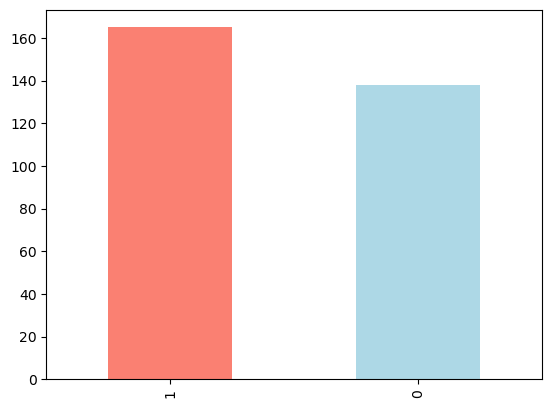

In [5]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequenty according to Sex

In [9]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column with sex column
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


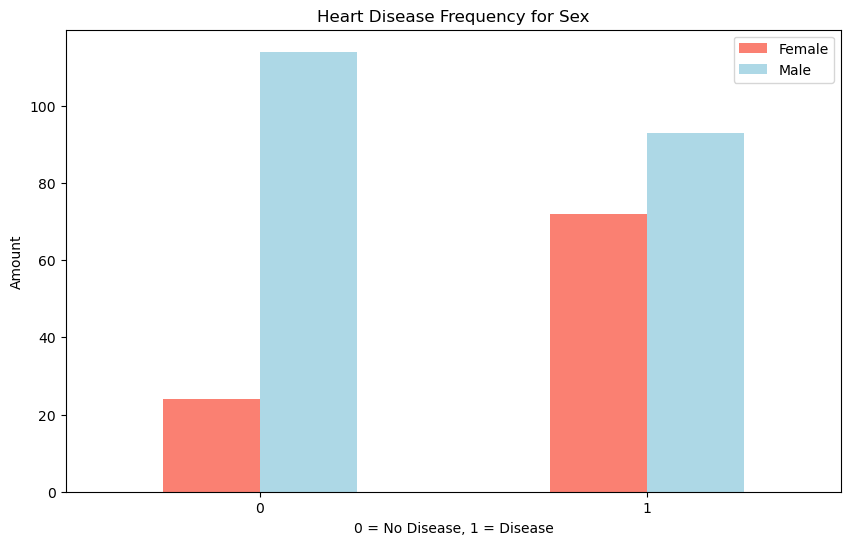

In [11]:
# Create a plot of crosstab
pd.crosstab(df["target"], df["sex"]).plot(kind="bar",
                                         figsize=(10, 6),
                                         color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Age vs Max Heart Rate for Heart Disease



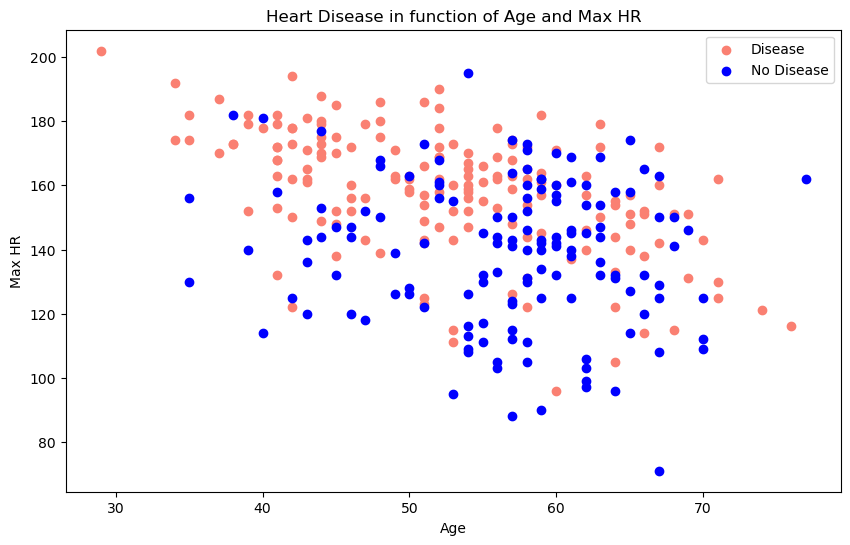

In [12]:
# Create another figure

plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df["age"][df["target"] == 1], 
            df["thalach"][df["target"] == 1],
            color="salmon");

# Scatter with negative examples
plt.scatter(df["age"][df["target"] == 0],
            df["thalach"][df["target"] == 0],
            color="blue");

plt.title("Heart Disease in function of Age and Max HR")
plt.xlabel("Age")
plt.ylabel("Max HR")
plt.legend(["Disease", "No Disease"]);

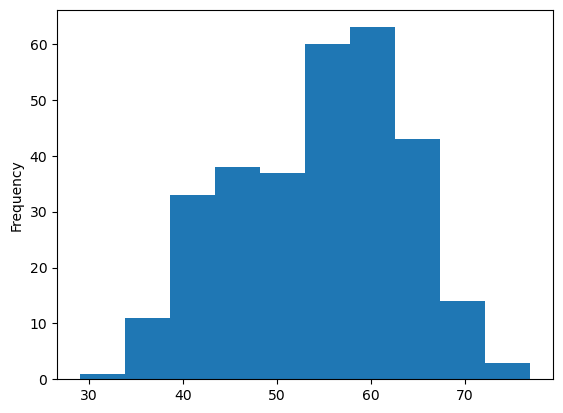

In [13]:
# Check the distribution of the age column with a histogram
df["age"].plot.hist();

### Heart Disease Frequency per Chest Pain Type
cp - chest pain type
* 0: typical angina
* 1: atypical angina
* 2: non-anginal
* 3: asymptomatic


In [14]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


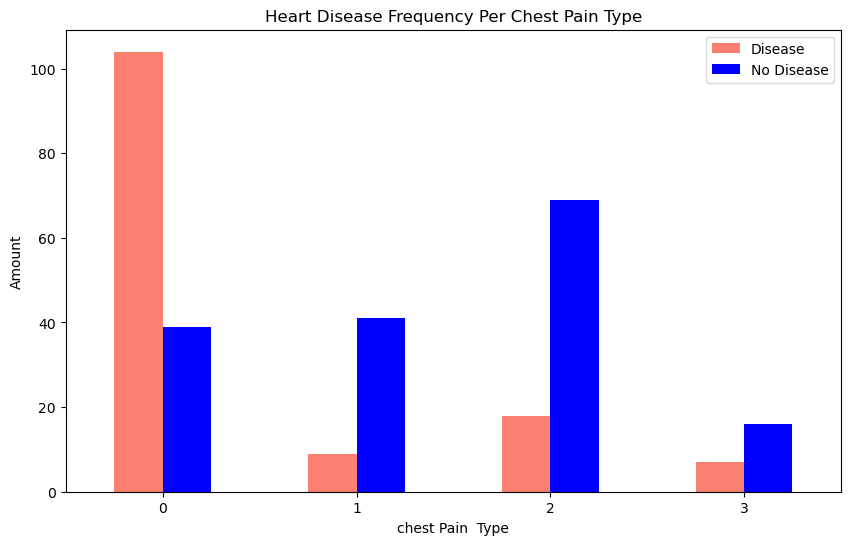

In [15]:
# Make the crosstab more visual

pd.crosstab(df["cp"], df["target"]).plot(kind="bar",
                                         figsize=(10, 6),
                                         color=["salmon", "blue"]);

# Add some communicastion
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("chest Pain  Type")
plt.ylabel("Amount")
plt.legend(["Disease", "No Disease"])
plt.xticks(rotation=0);

In [17]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


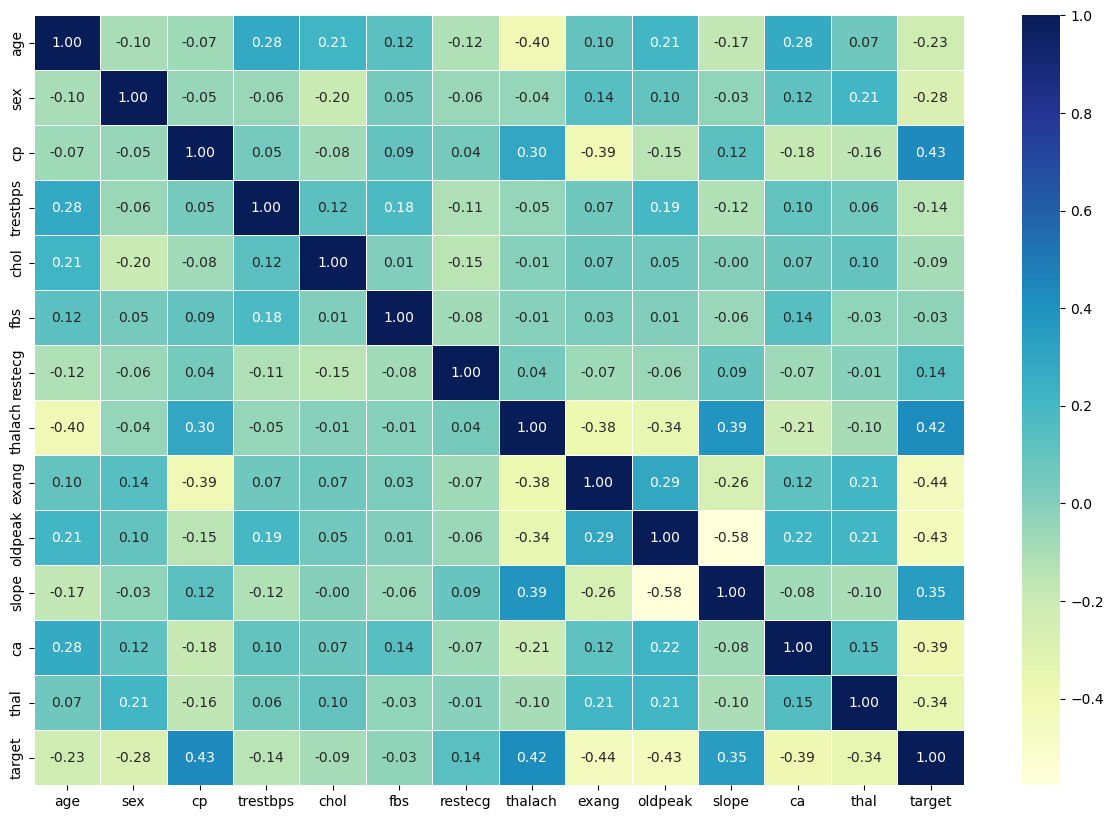

In [22]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

## 5. Modelling

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [27]:
# Split data into train and test
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2)

We're going to try 3 different ML methods:

1. Logistic Regression
2. K-neighbours Classifier
3. Random Forest Classifier

In [35]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates givem ML models
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = round(model.score(X_test, y_test), 2)
    return model_scores

In [38]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

C:\Users\adamz\Documents\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model Comparison

{'Logistic Regression': 0.89, 'KNN': 0.69, 'Random Forest': 0.84}

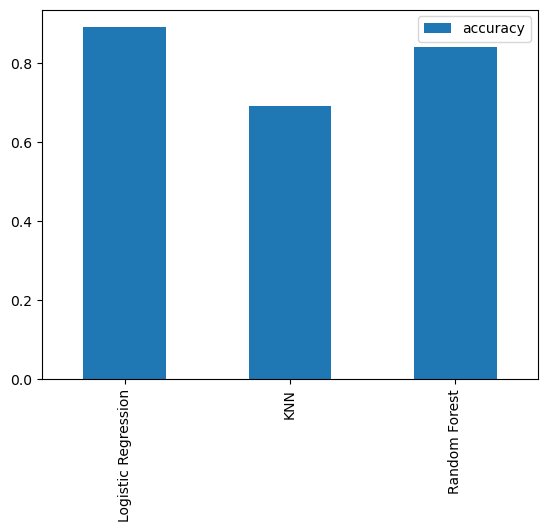

In [71]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();
model_scores

### Let's look at the following:

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve

## Hypeparameter tuning

In [52]:
# Let's tune KNN

train_scores = [] 
test_scores = []

# Create a list of different values for n_neighbours
neighbours = range(1, 21, 1)

# Setup KNN instance
knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Max KNN score on the test data: 75.41%


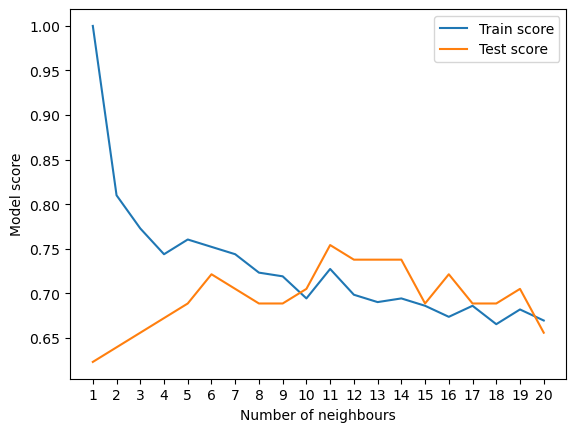

In [54]:
plt.plot(neighbours, train_scores, label="Train score")
plt.plot(neighbours, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model score")
plt.legend()

print(f"Max KNN score on the test data: {max(test_scores)* 100:.2f}%")

## Hyperparameter tuning with `RandomizedSearchCV()`

We're going to tune:
* `LogisticRegression()`
* `RandomForestClassifier()`

Using RandomizedSearchCV()

### Log Reg

In [67]:
# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]
               }

# Create a hyperparameter grid for Random Forest Classifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)
           }

In [62]:
# Tune Logistic Regression
np.random.seed(42)

# Setup random hyperparameter search for LogReg
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

In [63]:
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [64]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [65]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

### Random Forest Classifier

In [68]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [69]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [70]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

## Hyperparameter Tuning with `GridSearchCV()`

In [72]:
# Different hyperparameters for our Log Reg model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]
               }

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [73]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [74]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion Matrix
* Classification report
* Precision
* Recall
* F1-Score

... with cross-validation.

#### To make evaluations first we need to make predictions

In [77]:
# Make predictions
y_preds = gs_log_reg.predict(X_test)

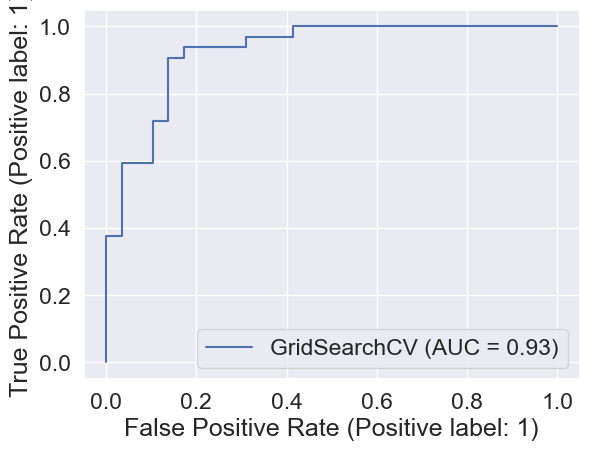

In [84]:
# Plot ROC Curve
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

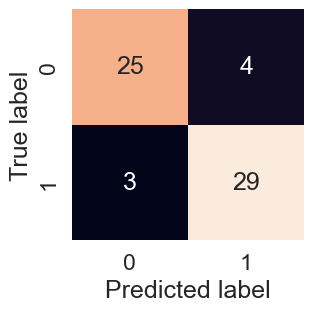

In [88]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test, y_preds)

In [90]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We're going to calculate: accuracy, precision, recall and f-1 score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [91]:
# Check best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [92]:
# Create classifier with best params
clf = LogisticRegression(C=0.20433597178569418, 
                         solver = "liblinear")

In [106]:
# Cross-validated accuracy 
cv_acc = cross_val_score(clf,
                         X,
                         y, 
                         cv=5,
                         scoring = "accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [107]:
# Cross-validated precision 
cv_prec = cross_val_score(clf,
                         X,
                         y, 
                         cv=5,
                         scoring = "precision")
cv_prec = np.mean(cv_prec)
cv_prec

0.8207936507936507

In [108]:
# Cross-validated recall 
cv_rec = cross_val_score(clf,
                         X,
                         y, 
                         cv=5,
                         scoring = "recall")
cv_rec = np.mean(cv_rec)
cv_rec

0.9212121212121213

In [109]:
# Cross-validated f-1 score 
cv_f1 = cross_val_score(clf,
                         X,
                         y,  
                         cv=5, 
                         scoring = "f1")
cv_f1 = np.mean(cv_f1) 
cv_f1

0.8673007976269721

In [112]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_prec,
                           "Recall": cv_rec,
                           "F-1 Score": cv_f1},
                         index = [0])
cv_metrics

,Accuracy,Precision,Recall,F-1 Score
0,0.844699,0.820794,0.921212,0.867301


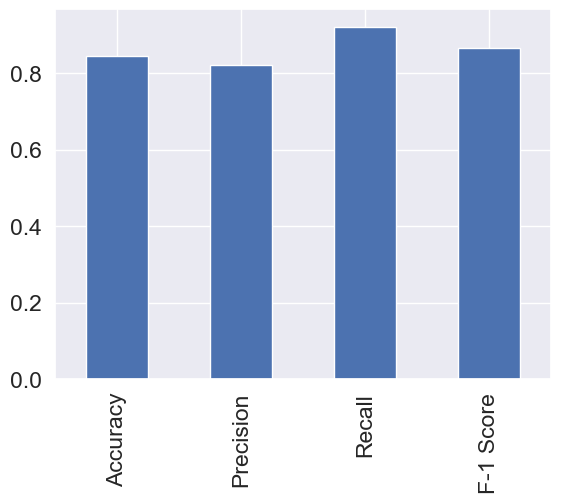

In [117]:
cv_metrics.T.plot.bar(legend=False);

### Feature Importance

Which features contributed most to the outcomes of the model and how did they contribute?

In [120]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")
clf.fit(X_train, y_train);

In [121]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [123]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

In [124]:
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

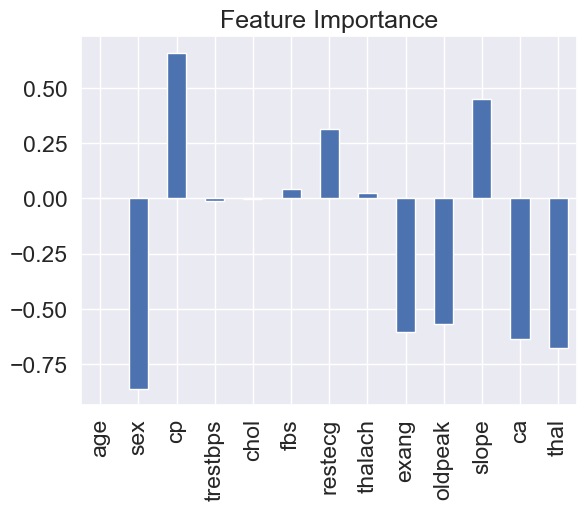

In [126]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);